In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import tldextract
from urllib.parse import urlparse

In [25]:
df = pd.read_csv("Phishing_dataset.csv")

In [26]:
df.head(10)

,URL,Domain,DomainLength,label
0,https://www.southbankmosaics.com,www.southbankmosaics.com,24,1
1,https://www.uni-mainz.de,www.uni-mainz.de,16,1
2,https://www.voicefmradio.co.uk,www.voicefmradio.co.uk,22,1
3,https://www.sfnmjournal.com,www.sfnmjournal.com,19,1
4,https://www.rewildingargentina.org,www.rewildingargentina.org,26,1
5,https://www.globalreporting.org,www.globalreporting.org,23,1
6,https://www.saffronart.com,www.saffronart.com,18,1
7,https://www.nerdscandy.com,www.nerdscandy.com,18,1
8,https://www.hyderabadonline.in,www.hyderabadonline.in,22,1
9,https://www.aap.org,www.aap.org,11,1


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   URL           235795 non-null  object
 1   Domain        235795 non-null  object
 2   DomainLength  235795 non-null  int64 
 3   label         235795 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 7.2+ MB


In [28]:
df.isna().sum()

URL             0
Domain          0
DomainLength    0
label           0
dtype: int64

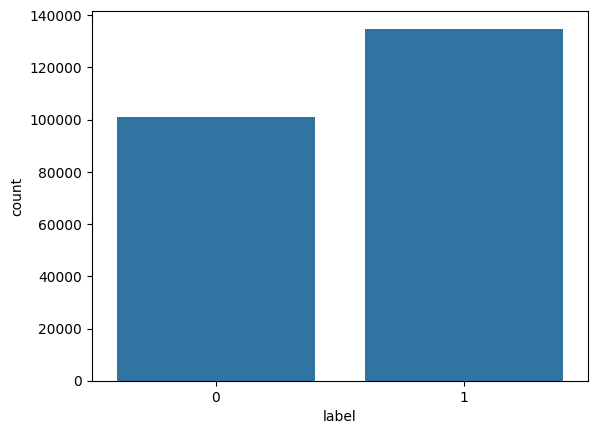

In [29]:
sns.countplot(x = "label" , data = df)
plt.show()

## Feature Extraction

In [30]:
##length of URL

def length(url):
    return len(url)

df["URL_length"] = df["URL"].apply(length)

In [31]:
#### Domain name 
def get_domain_name(url):
    extracted = tldextract.extract(url)
    domain_name =  f'{extracted.domain}.{extracted.suffix}'
    return domain_name


df["domain_name"] = df["URL"].apply(get_domain_name)

In [32]:
####Domain name length

def get_dlength(domain):
    return len(domain)

df["domain_length"] = df["domain_name"].apply(get_dlength)

In [35]:
##IS HTTPS
def ishttps(url):
    if re.match(r"^https?://",url):
        return 1
    else:
        return 0


df["is_HTTPS"] = df["URL"].apply(ishttps)

In [36]:
##Is IP
def isIP(url):
    if re.match(r"^(\d{1,3}\.){3}\d{1,3}$",url):
        return 1
    else:
        return 0
    
df["is_IP"] = df["URL"].apply(isIP)

In [37]:
### No of subdomain in the URl
def count_of_subdomains(url):
    parsed_url = urlparse(url)
    domain_parts = parsed_url.hostname.split('.')

    return len(domain_parts) - 2 if len(domain_parts) > 2 else 0

df["Subdomains"] = df["URL"].apply(count_of_subdomains)


In [38]:
def check_double_slash_position(url):
    corr_pos = 6 if url.startswith("http://") else 7 if url.startswith("https://") else -1
    first_occur = url.find("//") + 1 

    next_occur = url.find("//" , first_occur + 2)

    if corr_pos == -1:
        return -1
    elif next_occur != -1:
        return 1
    else:
        return 0
    

df["pos_of_dslash"] = df["URL"].apply(check_double_slash_position)

In [40]:
df.sample(10)


,URL,Domain,DomainLength,label,URL_length,domain_name,domain_length,is_HTTPS,is_IP,Subdomains,pos_of_dslash
17047,https://sdzfyt41.firebaseapp.com/,sdzfyt41.firebaseapp.com,24,0,33,firebaseapp.com,15,1,0,1,0
163609,https://www.belspo.be,www.belspo.be,13,1,21,belspo.be,9,1,0,1,0
73321,https://bafybeiguvln4kb2nx2oq3qjf4fskswohzgysv...,bafybeiguvln4kb2nx2oq3qjf4fskswohzgysvisgmiu7f...,74,0,83,dweb.link,9,1,0,2,0
17588,https://www.ssec.org,www.ssec.org,12,1,20,ssec.org,8,1,0,1,0
207823,https://dhgawqkbbhg.weeblysite.com/,dhgawqkbbhg.weeblysite.com,26,0,35,weeblysite.com,14,1,0,1,0
99460,http://www.skyrim.3d-game.com,www.skyrim.3d-game.com,22,0,29,3d-game.com,11,1,0,2,0
56489,https://www.irsvideos.gov,www.irsvideos.gov,17,1,25,irsvideos.gov,13,1,0,1,0
112237,https://ipfs.io/ipfs/qmzkcewugkyyafxnpggbej99c...,ipfs.io,7,0,68,ipfs.io,7,1,0,0,0
143144,http://lonestarinterior.com/,lonestarinterior.com,20,0,28,lonestarinterior.com,20,1,0,0,0
191887,https://business-meta-security-1567811.firebas...,business-meta-security-1567811.firebaseapp.com,46,0,55,firebaseapp.com,15,1,0,1,0
